In [1]:
# import needed packages
import re
import glob
import pandas as pd

import nltk
from nltk.tokenize import TweetTokenizer 
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader  import SentimentIntensityAnalyzer 

import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from wordcloud import WordCloud, STOPWORDS

import time
from datetime import date
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

# downloads to be uncommented for the first time
#nltk.download('vader_lexicon')
#nltk.download('wordnet')


In [2]:
#read the input file containing the tweets between Aug - Dec 2018
oneplus= pd.concat([pd.read_csv(f,sep = ';',error_bad_lines=False, encoding = 'UTF=8') for f in glob.glob('./OnePlus/Oneplus*.csv')], ignore_index = True)
oneplus['source'] = '@oneplus'
#read the input file containing the tweets between Aug - Dec 2018
News= pd.concat([pd.read_csv(f,sep = ';',error_bad_lines=False, encoding = 'UTF=8') for f in glob.glob('./News/*.csv')], ignore_index = True)
News['source'] = '@CNN @WSJ'
#read the input file containing the tweets between Aug - Dec 2018
AAPL= pd.concat([pd.read_csv(f,sep = ';',error_bad_lines=False, encoding = 'UTF=8') for f in glob.glob('./AAPL/AAPL.csv')], ignore_index = True)
AAPL['source'] = '#AAPL'
#read the input file containing the tweets between Aug - Dec 2018
Apple= pd.concat([pd.read_csv(f,sep = ';',error_bad_lines=False, encoding = 'UTF=8') for f in glob.glob('./Apple/*Apple*.csv')], ignore_index = True)
Apple['source'] = '@Apple'

#read the input file containing the tweets between Aug - Dec 2018
iPhone= pd.concat([pd.read_csv(f,sep = ';',error_bad_lines=False, encoding = 'UTF=8') for f in glob.glob('./iPhone/iPhone*.csv')], ignore_index = True)
iPhone['source'] = 'iPhone'

b'Skipping line 6125: expected 11 fields, saw 12\n'
b'Skipping line 21671: expected 11 fields, saw 12\nSkipping line 29542: expected 11 fields, saw 12\nSkipping line 50607: expected 11 fields, saw 12\nSkipping line 57683: expected 11 fields, saw 12\nSkipping line 58053: expected 11 fields, saw 12\nSkipping line 59951: expected 11 fields, saw 12\nSkipping line 61901: expected 11 fields, saw 12\n'
b'Skipping line 65825: expected 11 fields, saw 12\nSkipping line 78871: expected 11 fields, saw 12\nSkipping line 86938: expected 11 fields, saw 12\nSkipping line 87114: expected 11 fields, saw 12\n'
b'Skipping line 236: expected 11 fields, saw 12\nSkipping line 4476: expected 11 fields, saw 12\n'
b'Skipping line 1033: expected 11 fields, saw 12\nSkipping line 1082: expected 11 fields, saw 12\n'
b'Skipping line 652: expected 11 fields, saw 12\nSkipping line 1715: expected 11 fields, saw 12\n'
b'Skipping line 910: expected 11 fields, saw 12\n'
b'Skipping line 2461: expected 11 fields, saw 12\n'


In [5]:
input_dataset = pd.concat([oneplus,News,AAPL,Apple,iPhone],ignore_index=True)

In [6]:
input_dataset.tail()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,lang,source
662661,isdakr_loveinfo,2018-09-09 03:01,0,0,フォロワー様からの情報* 人気声優出演のスマホてドラマCDが楽しめていた「ポケット★ドラマC...,NaN,NaN,NaN,1.038540e+18,https://twitter.com/isdakr_loveinfo/status/103...,ja,iPhone
662662,that_gen,2018-09-09 03:01,0,12,I HOPE THE MAN THAT REPLACED MY IPHONE FOR FRE...,NaN,NaN,NaN,1.038540e+18,https://twitter.com/that_gen/status/1038540275...,en,iPhone
662663,KARMAUS,2018-09-09 03:01,0,0,Check out New in Box Sonix Clear Coat Cover Ca...,NaN,@,#,1.038540e+18,https://twitter.com/KARMAUS/status/10385402484...,en,iPhone
662664,YouTube_douga,2018-09-09 03:01,0,0,iPhoneでできるFX、チャートも何気に便利 http://youtu.be/9O4JtP...,NaN,NaN,#,1.038540e+18,https://twitter.com/YouTube_douga/status/10385...,ja,iPhone
662665,kmtmuqs,2018-09-09 03:01,0,1,Ok where is the cheapest pleace to get legit i...,NaN,NaN,NaN,1.038540e+18,https://twitter.com/kmtmuqs/status/10385402403...,en,iPhone


In [7]:
#Select only the English tweets
english_tweets = input_dataset[input_dataset['lang'] == 'en']
english_tweets.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,lang,source
0,mweinbachXDA,2018-08-31 05:27,0,0,I have both. My OP6 has this weird edge on the...,NaN,NaN,NaN,1.035316e+18,https://twitter.com/mweinbachXDA/status/103531...,en,@oneplus
1,pixel_bebop,2018-08-31 05:26,0,0,@ oneplus what do I need to do to get the newe...,NaN,@,NaN,1.035315e+18,https://twitter.com/pixel_bebop/status/1035315...,en,@oneplus
2,silvinhopdf,2018-08-31 05:07,0,0,I've enter the latest @ docsquiffy competition...,NaN,@ @,#,1.035311e+18,https://twitter.com/silvinhopdf/status/1035310...,en,@oneplus
3,raj_ayy,2018-08-31 05:03,0,0,. @ oneplus has anyone checked on the latest s...,NaN,@,NaN,1.035310e+18,https://twitter.com/raj_ayy/status/10353096367...,en,@oneplus
4,orolon21,2018-08-31 04:49,2,2,Will it come along with the new system interfa...,NaN,@,NaN,1.035306e+18,https://twitter.com/orolon21/status/1035306041...,en,@oneplus


In [8]:
#Remove punctuations, digits; remove double spaces and short words
english_tweets['cleantext'] = input_dataset['text'].apply(lambda x: re.sub('[#$@:)!/&.,?;0-9]', '', str(x)))
english_tweets['cleantext'] = english_tweets['cleantext'].apply(lambda x: re.sub('  ', ' ', str(x)))
english_tweets['cleantext'] = english_tweets['cleantext'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
english_tweets.head()


,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,lang,source,cleantext
0,mweinbachXDA,2018-08-31 05:27,0,0,I have both. My OP6 has this weird edge on the...,NaN,NaN,NaN,1.035316e+18,https://twitter.com/mweinbachXDA/status/103531...,en,@oneplus,have both has this weird edge the back glass t...
1,pixel_bebop,2018-08-31 05:26,0,0,@ oneplus what do I need to do to get the newe...,NaN,@,NaN,1.035315e+18,https://twitter.com/pixel_bebop/status/1035315...,en,@oneplus,oneplus what need get the newest one plus phone
2,silvinhopdf,2018-08-31 05:07,0,0,I've enter the latest @ docsquiffy competition...,NaN,@ @,#,1.035311e+18,https://twitter.com/silvinhopdf/status/1035310...,en,@oneplus,I've enter the latest docsquiffy competition w...
3,raj_ayy,2018-08-31 05:03,0,0,. @ oneplus has anyone checked on the latest s...,NaN,@,NaN,1.035310e+18,https://twitter.com/raj_ayy/status/10353096367...,en,@oneplus,oneplus has anyone checked the latest system u...
4,orolon21,2018-08-31 04:49,2,2,Will it come along with the new system interfa...,NaN,@,NaN,1.035306e+18,https://twitter.com/orolon21/status/1035306041...,en,@oneplus,Will come along with the new system interface ...


In [9]:
#Conver the text to lower case and tokenise it.
english_tweets['cleantext'] = english_tweets['cleantext'].apply(lambda x: x.lower())
english_tweets['tokens'] = english_tweets['cleantext'].apply(TweetTokenizer().tokenize) 
english_tweets.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,lang,source,cleantext,tokens
0,mweinbachXDA,2018-08-31 05:27,0,0,I have both. My OP6 has this weird edge on the...,NaN,NaN,NaN,1.035316e+18,https://twitter.com/mweinbachXDA/status/103531...,en,@oneplus,have both has this weird edge the back glass t...,"[have, both, has, this, weird, edge, the, back..."
1,pixel_bebop,2018-08-31 05:26,0,0,@ oneplus what do I need to do to get the newe...,NaN,@,NaN,1.035315e+18,https://twitter.com/pixel_bebop/status/1035315...,en,@oneplus,oneplus what need get the newest one plus phone,"[oneplus, what, need, get, the, newest, one, p..."
2,silvinhopdf,2018-08-31 05:07,0,0,I've enter the latest @ docsquiffy competition...,NaN,@ @,#,1.035311e+18,https://twitter.com/silvinhopdf/status/1035310...,en,@oneplus,i've enter the latest docsquiffy competition w...,"[i've, enter, the, latest, docsquiffy, competi..."
3,raj_ayy,2018-08-31 05:03,0,0,. @ oneplus has anyone checked on the latest s...,NaN,@,NaN,1.035310e+18,https://twitter.com/raj_ayy/status/10353096367...,en,@oneplus,oneplus has anyone checked the latest system u...,"[oneplus, has, anyone, checked, the, latest, s..."
4,orolon21,2018-08-31 04:49,2,2,Will it come along with the new system interfa...,NaN,@,NaN,1.035306e+18,https://twitter.com/orolon21/status/1035306041...,en,@oneplus,will come along with the new system interface ...,"[will, come, along, with, the, new, system, in..."


In [10]:
#Remove the stop words: 
#nltk.download('stopwords')
stopwords_vocabulary = stopwords.words('english')
english_tweets['cleantoken'] = english_tweets['tokens'].apply(lambda x: [i for i in x if i.lower() not in stopwords_vocabulary])
english_tweets.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,lang,source,cleantext,tokens,cleantoken
0,mweinbachXDA,2018-08-31 05:27,0,0,I have both. My OP6 has this weird edge on the...,NaN,NaN,NaN,1.035316e+18,https://twitter.com/mweinbachXDA/status/103531...,en,@oneplus,have both has this weird edge the back glass t...,"[have, both, has, this, weird, edge, the, back...","[weird, edge, back, glass, feels, sharp, dont,..."
1,pixel_bebop,2018-08-31 05:26,0,0,@ oneplus what do I need to do to get the newe...,NaN,@,NaN,1.035315e+18,https://twitter.com/pixel_bebop/status/1035315...,en,@oneplus,oneplus what need get the newest one plus phone,"[oneplus, what, need, get, the, newest, one, p...","[oneplus, need, get, newest, one, plus, phone]"
2,silvinhopdf,2018-08-31 05:07,0,0,I've enter the latest @ docsquiffy competition...,NaN,@ @,#,1.035311e+18,https://twitter.com/silvinhopdf/status/1035310...,en,@oneplus,i've enter the latest docsquiffy competition w...,"[i've, enter, the, latest, docsquiffy, competi...","[i've, enter, latest, docsquiffy, competition,..."
3,raj_ayy,2018-08-31 05:03,0,0,. @ oneplus has anyone checked on the latest s...,NaN,@,NaN,1.035310e+18,https://twitter.com/raj_ayy/status/10353096367...,en,@oneplus,oneplus has anyone checked the latest system u...,"[oneplus, has, anyone, checked, the, latest, s...","[oneplus, anyone, checked, latest, system, upd..."
4,orolon21,2018-08-31 04:49,2,2,Will it come along with the new system interfa...,NaN,@,NaN,1.035306e+18,https://twitter.com/orolon21/status/1035306041...,en,@oneplus,will come along with the new system interface ...,"[will, come, along, with, the, new, system, in...","[come, along, new, system, interface, hope, lo..."


In [11]:
#lemmatisation
nltk.download('wordnet')
english_tweets['text_lem'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) for line in lists]).strip() for lists in english_tweets['cleantext']]
english_tweets.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abhijit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,lang,source,cleantext,tokens,cleantoken,text_lem
0,mweinbachXDA,2018-08-31 05:27,0,0,I have both. My OP6 has this weird edge on the...,NaN,NaN,NaN,1.035316e+18,https://twitter.com/mweinbachXDA/status/103531...,en,@oneplus,have both has this weird edge the back glass t...,"[have, both, has, this, weird, edge, the, back...","[weird, edge, back, glass, feels, sharp, dont,...",have both has this weird edge the back glass t...
1,pixel_bebop,2018-08-31 05:26,0,0,@ oneplus what do I need to do to get the newe...,NaN,@,NaN,1.035315e+18,https://twitter.com/pixel_bebop/status/1035315...,en,@oneplus,oneplus what need get the newest one plus phone,"[oneplus, what, need, get, the, newest, one, p...","[oneplus, need, get, newest, one, plus, phone]",oneplus what need get the newest one plus phone
2,silvinhopdf,2018-08-31 05:07,0,0,I've enter the latest @ docsquiffy competition...,NaN,@ @,#,1.035311e+18,https://twitter.com/silvinhopdf/status/1035310...,en,@oneplus,i've enter the latest docsquiffy competition w...,"[i've, enter, the, latest, docsquiffy, competi...","[i've, enter, latest, docsquiffy, competition,...",i ve enter the latest docsquiffy competition w...
3,raj_ayy,2018-08-31 05:03,0,0,. @ oneplus has anyone checked on the latest s...,NaN,@,NaN,1.035310e+18,https://twitter.com/raj_ayy/status/10353096367...,en,@oneplus,oneplus has anyone checked the latest system u...,"[oneplus, has, anyone, checked, the, latest, s...","[oneplus, anyone, checked, latest, system, upd...",oneplus has anyone checked the latest system u...
4,orolon21,2018-08-31 04:49,2,2,Will it come along with the new system interfa...,NaN,@,NaN,1.035306e+18,https://twitter.com/orolon21/status/1035306041...,en,@oneplus,will come along with the new system interface ...,"[will, come, along, with, the, new, system, in...","[come, along, new, system, interface, hope, lo...",will come along with the new system interface ...


In [12]:
#Sentiment Analysis using Vader
sent = SentimentIntensityAnalyzer()

english_tweets['compound']=english_tweets.text_lem.apply(lambda x:sent.polarity_scores(x)['compound'])
english_tweets['neutral']=english_tweets.text_lem.apply(lambda x:sent.polarity_scores(x)['neu'])
english_tweets['negative']=english_tweets.text_lem.apply(lambda x:sent.polarity_scores(x)['neg'])
english_tweets['positive']=english_tweets.text_lem.apply(lambda x:sent.polarity_scores(x)['pos'])

#Classifying the sentiment type based on the compound sentiment score
english_tweets['sentiment_type']=''
english_tweets.loc[english_tweets['compound'] > 0,'sentiment_type']='POSITIVE'
english_tweets.loc[english_tweets['compound'] == 0,'sentiment_type']='NEUTRAL'
english_tweets.loc[english_tweets['compound'] < 0,'sentiment_type']='NEGATIVE'
english_tweets.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,...,source,cleantext,tokens,cleantoken,text_lem,compound,neutral,negative,positive,sentiment_type
0,mweinbachXDA,2018-08-31 05:27,0,0,I have both. My OP6 has this weird edge on the...,NaN,NaN,NaN,1.035316e+18,https://twitter.com/mweinbachXDA/status/103531...,...,@oneplus,have both has this weird edge the back glass t...,"[have, both, has, this, weird, edge, the, back...","[weird, edge, back, glass, feels, sharp, dont,...",have both has this weird edge the back glass t...,-0.2926,0.734,0.183,0.083,NEGATIVE
1,pixel_bebop,2018-08-31 05:26,0,0,@ oneplus what do I need to do to get the newe...,NaN,@,NaN,1.035315e+18,https://twitter.com/pixel_bebop/status/1035315...,...,@oneplus,oneplus what need get the newest one plus phone,"[oneplus, what, need, get, the, newest, one, p...","[oneplus, need, get, newest, one, plus, phone]",oneplus what need get the newest one plus phone,0.0000,1.000,0.000,0.000,NEUTRAL
2,silvinhopdf,2018-08-31 05:07,0,0,I've enter the latest @ docsquiffy competition...,NaN,@ @,#,1.035311e+18,https://twitter.com/silvinhopdf/status/1035310...,...,@oneplus,i've enter the latest docsquiffy competition w...,"[i've, enter, the, latest, docsquiffy, competi...","[i've, enter, latest, docsquiffy, competition,...",i ve enter the latest docsquiffy competition w...,0.5859,0.808,0.000,0.192,POSITIVE
3,raj_ayy,2018-08-31 05:03,0,0,. @ oneplus has anyone checked on the latest s...,NaN,@,NaN,1.035310e+18,https://twitter.com/raj_ayy/status/10353096367...,...,@oneplus,oneplus has anyone checked the latest system u...,"[oneplus, has, anyone, checked, the, latest, s...","[oneplus, anyone, checked, latest, system, upd...",oneplus has anyone checked the latest system u...,0.2263,0.881,0.000,0.119,POSITIVE
4,orolon21,2018-08-31 04:49,2,2,Will it come along with the new system interfa...,NaN,@,NaN,1.035306e+18,https://twitter.com/orolon21/status/1035306041...,...,@oneplus,will come along with the new system interface ...,"[will, come, along, with, the, new, system, in...","[come, along, new, system, interface, hope, lo...",will come along with the new system interface ...,0.9042,0.495,0.000,0.505,POSITIVE


In [13]:
print(english_tweets['sentiment_type'].value_counts())
english_tweets.info()

POSITIVE    206128
NEUTRAL     131637
NEGATIVE     93413
Name: sentiment_type, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 431178 entries, 0 to 662665
Data columns (total 21 columns):
username          431178 non-null object
date              431178 non-null object
retweets          431178 non-null object
favorites         431178 non-null object
text              431178 non-null object
geo               0 non-null object
mentions          223819 non-null object
hashtags          99316 non-null object
id                431178 non-null float64
permalink         431178 non-null object
lang              431178 non-null object
source            431178 non-null object
cleantext         431178 non-null object
tokens            431178 non-null object
cleantoken        431178 non-null object
text_lem          431178 non-null object
compound          431178 non-null float64
neutral           431178 non-null float64
negative          431178 non-null float64
positive          43

In [14]:
#Strip the date the tweet was created
english_tweets['UpdDate'] =  pd.to_datetime(english_tweets['date'])
english_tweets['NDate'] = pd.Series([val.date() for val in english_tweets['UpdDate']])
english_tweets.info()
english_tweets.to_csv('AllTwts.csv', encoding='utf-8')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 431178 entries, 0 to 662665
Data columns (total 23 columns):
username          431178 non-null object
date              431178 non-null object
retweets          431178 non-null object
favorites         431178 non-null object
text              431178 non-null object
geo               0 non-null object
mentions          223819 non-null object
hashtags          99316 non-null object
id                431178 non-null float64
permalink         431178 non-null object
lang              431178 non-null object
source            431178 non-null object
cleantext         431178 non-null object
tokens            431178 non-null object
cleantoken        431178 non-null object
text_lem          431178 non-null object
compound          431178 non-null float64
neutral           431178 non-null float64
negative          431178 non-null float64
positive          431178 non-null float64
sentiment_type    431178 non-null object
UpdDate           431178 non-

In [1]:
positive_tweets = english_tweets[english_tweets['compound'] > 0]
positive_tweets.to_csv('PosTwts.csv', encoding='utf-8')



NameError: name 'english_tweets' is not defined

In [2]:
negative_tweets = english_tweets[english_tweets['compound'] < 0]
negative_tweets.to_csv('NegTwts.csv', encoding='utf-8')


NameError: name 'english_tweets' is not defined

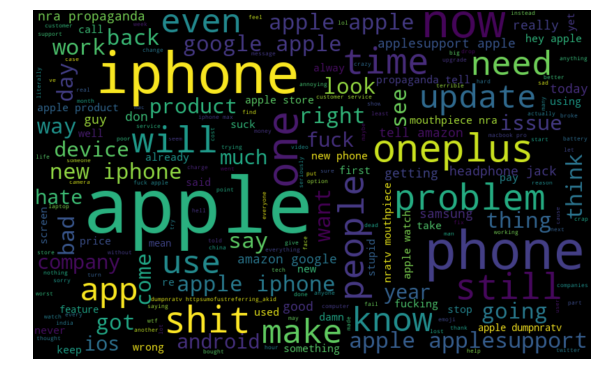

In [17]:
#Wordcloud for the negative words
neg_words = ' '.join([text for text in english_tweets['cleantext'][english_tweets['compound'] < 0]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(neg_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

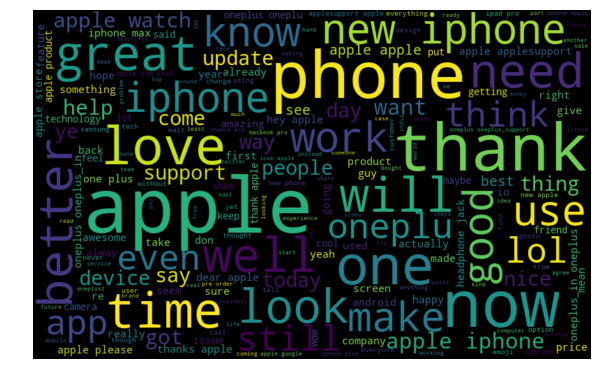

In [18]:
#wordcloud for the positive words
pos_words = ' '.join([text for text in english_tweets['cleantext'][english_tweets['compound'] > 0]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(pos_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()